In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\modyr\Desktop\Youtube Analysis\Youtube_Data_Analysis\yt_data.csv')

df.head(2)

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,wsCmWZSASes,"Tank vs Roach FIGHT HIGHLIGHTS: March 1, 2025 ...",Gervonta Davis and Lamont Roach fought an epic...,2025-03-02T06:35:42Z,UCWXYAGB9SadlL6p5Bb66wWw,Premier Boxing Champions,17,"['Boxing', 'Gervonta Davis', 'Gervonta Davis v...",PT3M22S,hd,False,2486351,23841,0,0,6725
1,mS8W6NY6QjQ,FULL SEGMENT: John Cena SELLS OUT and ruthless...,After Undisputed WWE Champion Cody Rhodes emph...,2025-03-02T05:03:43Z,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,17,"['Cody Rhodes', 'John Cena', 'The Rock', 'Trav...",PT17M23S,hd,True,3695350,136355,0,0,23592


In [11]:
df.columns

Index(['video_id', 'title', 'description', 'published_at', 'channel_id',
       'channel_title', 'category_id', 'tags', 'duration', 'definition',
       'caption', 'view_count', 'like_count', 'dislike_count',
       'favorite_count', 'comment_count'],
      dtype='object')

In [12]:
top_commented_videos = df.pivot_table(index=['title', 'channel_title'], 
                                      values='comment_count', aggfunc='sum',
                                      ).sort_values(by='comment_count', 
                                                    ascending=False).head(10)

top_commented_videos

,,comment_count
title,channel_title,
Kendrick Lamar's Apple Music Super Bowl Halftime Show,NFL,175291
I Spent 100 Hours Inside The Pyramids!,MrBeast,92370
"JENNIE, Doechii - ExtraL (Official Video)",JennieRubyJaneVEVO,86698
LISA - FUTW (Vixi Solo Version) (Official Music Video),LLOUD Official,73738
IS THIS THE BEST BRAWLER EVER?!,Brawl Stars,53967
Hearts2Hearts 하츠투하츠 'The Chase' MV,SMTOWN,44811
G-DRAGON - TOO BAD (feat. Anderson .Paak) (Official Video),OfficialGDRAGON,40134
"100 People Trapped Inside 100 Circles For $500,000",MrBeast,33472
G-DRAGON - DRAMA (Official Video),OfficialGDRAGON,30922


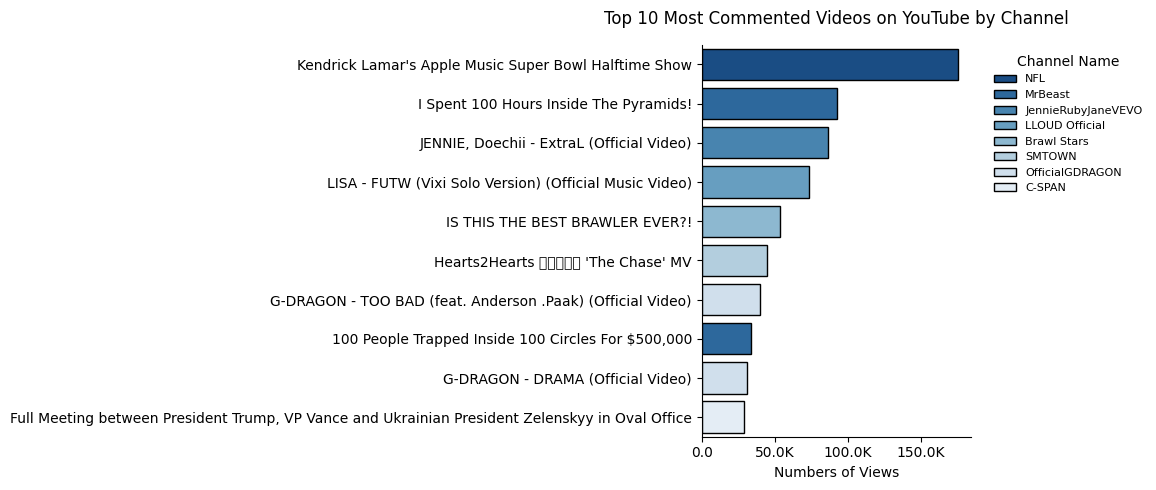

In [16]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top_commented_videos, 
            x='comment_count', 
            y='title',
            palette='Blues_r',
            edgecolor='k',
            hue='channel_title',
            #dodge=True,
            )

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.1f}K'.format(x*1e-3)
    else:
        return '{:1.1f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Top 10 Most Commented Videos on YouTube by Channel', pad=15)
plt.xlabel('Numbers of Views')
plt.ylabel('')
plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize=10, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**  

1. **Live Events & Controversial Content Drive Discussion**:  
   - **NFL’s Super Bowl Halftime Show** tops the chart (~160K comments), highlighting how live events and performances generate intense viewer engagement. Similarly, **C-SPAN’s political meeting** (Trump-Zelenskyy) sparks heated debate, underscoring the link between controversy and comment activity.  

2. **Music Videos Foster Community Interaction**:  
   - K-pop artists dominate the list (**Jennie**, **Lisa**, **G-DRON**) with ~80–90K comments each. Fans engage in theories, reactions, and global coordination, making music videos hubs for passionate discourse.  

3. **Gaming Communities Thrive on Engagement**:  
   - **Brawl Stars’ gameplay video** ("IS THIS THE BEST BRAWLER EVER?") garners ~50K comments, reflecting the gaming community’s tendency to analyze strategies, share tips, and debate character mechanics.  

4. **MrBeast’s Challenge-Based Content Balances Views and Comments**:  
   - While his pyramid video ranked #1 in views, it drops to #2 in comments (~100K). This suggests challenges attract massive audiences but may not sustain prolonged discussion compared to live events or music.  

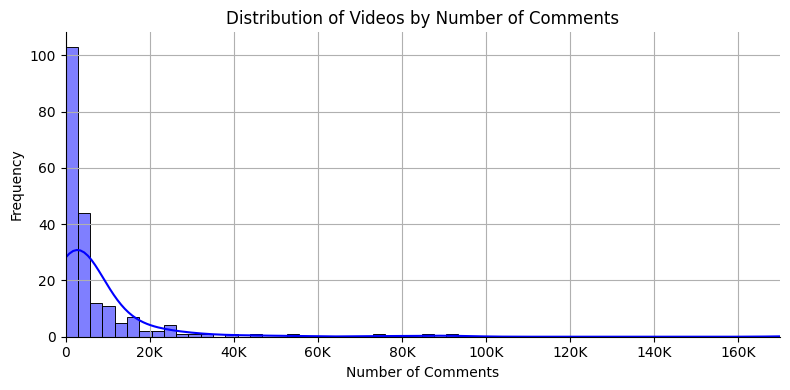

In [14]:
# videos distribution by comment
plt.figure(figsize=(8, 4))

sns.histplot(data=df,
             x='comment_count',
             bins=60,
             kde=True,
             palette='Blues_r',
             color='blue'
             
)

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.0f}K'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Distribution of Videos by Number of Comments')
plt.ylabel('Frequency')
plt.xlabel('Number of Comments')

plt.grid(True)
plt.xlim(0, 170000)
sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**  

1. **Extreme Skewness in Engagement**:  
   - The chart reveals a **power-law distribution**, where **a tiny fraction of videos dominate comment activity**. Most videos (~100) receive fewer than 5K comments, while a handful (e.g., the NFL Super Bowl Halftime Show) garner over 150K comments. This mirrors the "long-tail" trend observed in views, emphasizing that **only outliers achieve massive engagement**.  

2. **Viral Content Drives Commentary**:  
   - The steep drop-off post-20K comments highlights that **most videos fail to spark meaningful discussion**. Exceptions (e.g., live events, controversies) break through due to their emotional or cultural relevance, aligning with the earlier analysis of top-commented videos.  

3. **Contrast with Views Distribution**:  
   - While high-view videos (e.g., MrBeast’s challenges) may not always correlate with high comments, **content that provokes debate** (e.g., political meetings, live performances) tends to dominate both metrics. This suggests **contextual relevance** is critical for sustained engagement.